In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
t = titles
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [6]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
c = cast
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [9]:
t.title.value_counts().head()

Hamlet          18
Carmen          16
Macbeth         15
Maya            12
The Outsider    12
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [12]:
t[t.year // 10 == 193].year.value_counts().head(3)

1937    1197
1936    1138
1938    1129
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

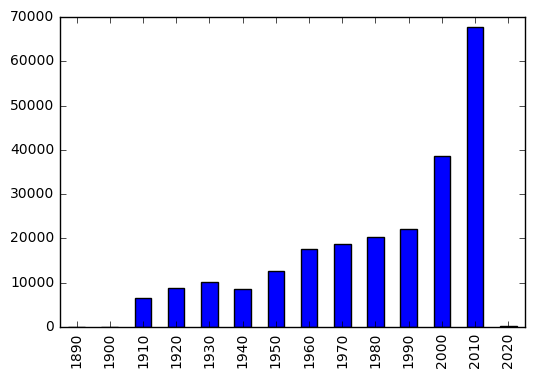

In [15]:
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

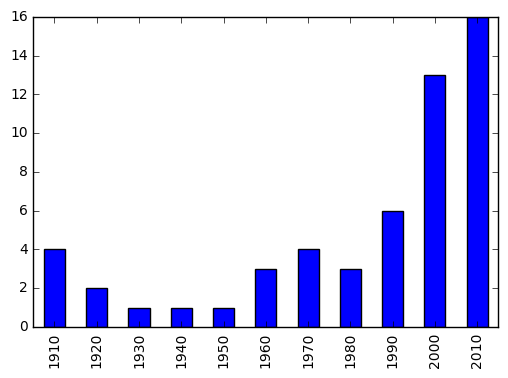

In [20]:
(t[t.title.str.contains('Hamlet')].year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

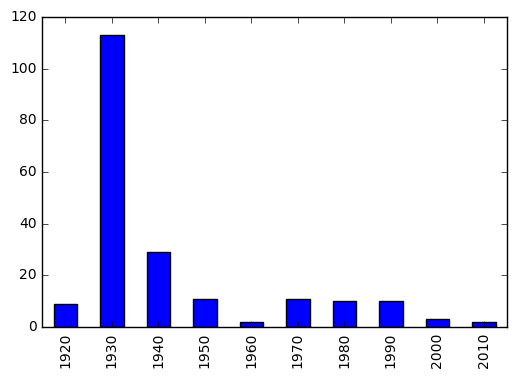

In [28]:
(c[c.character.str.contains('Rustler')].year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

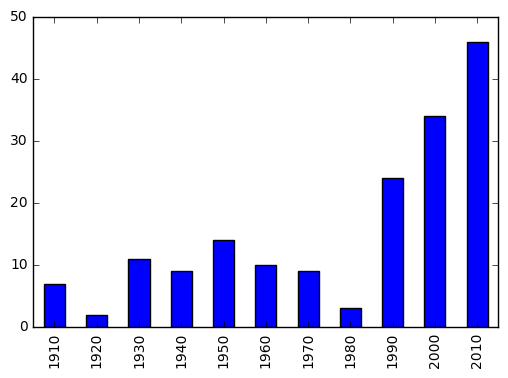

In [27]:
(c[c.character.str.contains('Hamlet')].year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [30]:
c.character.value_counts().head(11)

Himself        19633
Dancer         12087
Extra          10951
Reporter        8150
Doctor          7421
Student         7177
Policeman       6880
Party Guest     6736
Nurse           6668
Bartender       6611
Minor Role      6245
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [33]:
c[c.character=='Herself'].name.value_counts().head(10)

Queen Elizabeth II    11
Joyce Brothers         9
Margaret Thatcher      8
Mary Jo Pehl           7
Hillary Clinton        7
Sumie Sakai            6
Joan Rivers            6
Rekha                  5
Bunny Yeager           5
Kareena Kapoor         5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [34]:
c[c.character=='Himself'].name.value_counts().head(10)

Adolf Hitler             100
Richard Nixon             46
Ronald Reagan             39
John F. Kennedy           34
Winston Churchill         24
George W. Bush            23
Benito Mussolini          23
Ron Jeremy                23
Martin Luther King        21
Franklin D. Roosevelt     20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [35]:
c[c.year==1945].name.value_counts().head()

Emmett Vogan       39
Sam (II) Harris    32
Bess Flowers       29
Harold Miller      29
Nolan Leary        27
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [36]:
c[c.year==1985].name.value_counts().head()

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Aruna Irani      15
Mohanlal         15
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

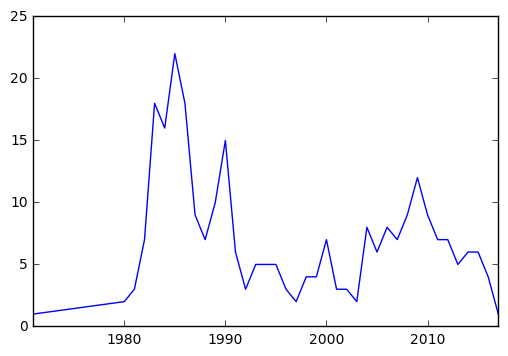

In [40]:
c[c.name=='Mammootty'].year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [41]:
c[c.character.str.startswith('Patron in')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Coffee Shop            2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [42]:
c[c.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         60
Science Fair Student     9
Science Student          9
Science Fair Judge       6
Science Kid              5
Science Club Member      5
Science Reporter         5
Science Promo Cadet      5
Science                  4
Science Officer          3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

/Users/cwoodson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


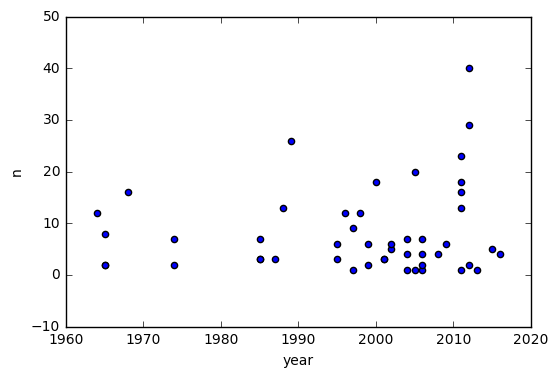

In [46]:
c[(c.name=='Judi Dench')&(c.n.notnull())].sort('year').plot(x='year', y='n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

/Users/cwoodson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


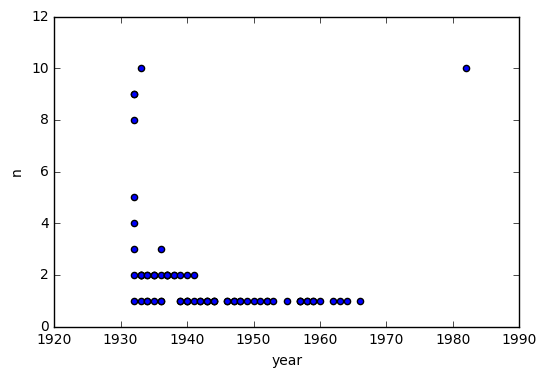

In [47]:
c[(c.name=='Cary Grant')&(c.n.notnull())].sort('year').plot(x='year', y='n', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

/Users/cwoodson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


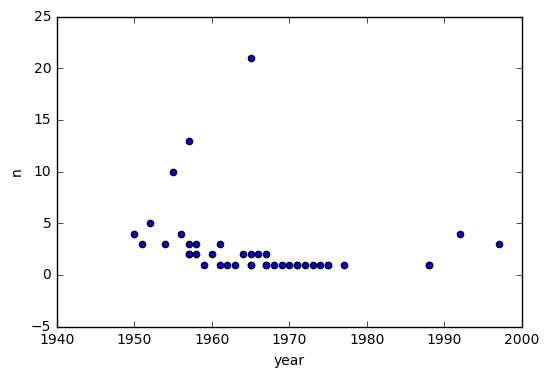

In [48]:
c[(c.name=='Sidney Poitier')&(c.n.notnull())].sort('year').plot(x='year', y='n', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [49]:
c[(c.n==1)&(c.year//10==195)].type.value_counts()

actor      6612
actress    2963
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?